#<font color = yellow> Analisando dados do ENEM 2021

#<font color = black> Importando as bibliotecas, montando Drive no Google e Mostrando os dados

#<font color = yellow> Extraindo fonte .zip

In [2]:
# Descompactando o arquivo zipado com a biblioteca zipfile:

import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/FonteDados/DadosEnem2021/Dataset/microdados_enem_2021.zip') as z:
    print(*z.namelist(), sep = '\n')


INPUTS/
INPUTS/INPUT_R_ITENS_PROVA_2021.R
INPUTS/INPUT_R_MICRODADOS_ENEM_2021.R
INPUTS/INPUT_SAS_ITENS_PROVA_2021.sas
INPUTS/INPUT_SAS_MICRODADOS_ENEM_2021.sas
INPUTS/INPUT_SPSS_ITENS_PROVA_2021.sps
INPUTS/INPUT_SPSS_MICRODADOS_ENEM_2021.sps
LEIA-ME E DOCUMENTOS TÉCNICOS/
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_Enem_2021_Digital.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_Enem_2021_Impresso.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/enem_procedimentos_de_analise.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/entenda_a_sua_nota_no_enem_guia_do_participante (2).pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2021.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2020.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf
PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2021_DIGITAL_CAD_01_DIA_1_AZUL_ESPANHOL.pdf
PROVAS E GABARITOS/ENEM_2021_DIGITAL_CAD_01_DIA_1_AZUL_INGLES.pdf
PROVAS E GABARITOS/ENEM_2021_DIGITAL_CAD_02_DIA_1_AMARELO_ESPANHOL.pdf
PROVAS E GABARITOS/ENEM_2021_DIGITAL_CAD_02_DIA_1_AMARELO_I

<font color = black> > Observando os dados descompacados e extraindo apenas os microdados para análises.

In [24]:
# Importando apenas os microdados do dataset
# DADOS/MICRODADOS_ENEM_2021.csv

with zipfile.ZipFile('/content/drive/MyDrive/FonteDados/DadosEnem2021/Dataset/microdados_enem_2021.zip') as z:
   with z.open('DADOS/MICRODADOS_ENEM_2021.csv') as f:
    dados = read_csv(f, sep = ';', encoding='ISO-8859-1')

#<font color = yellow> Extraindo dados do diretório local.

In [60]:
from pandas import read_csv

#Montando drive do Google
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

fonte = '/content/drive/MyDrive/FonteDados/DadosEnem2021/MICRODADOS_ENEM_2019_SAMPLE_43278.txt'
dados = pd.read_csv(fonte)
dados.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [62]:
# Observando os primeiros 5 dados do dataset
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


#<font color = yellow> Análise de Exploratória

In [43]:
# Verificando o tamanho do dataset
print('Tamanho do conjunto de dados:', dados.shape)

Tamanho do conjunto de dados: (127380, 136)


In [44]:
# Verificando as unidade federativas das provas e quantidade

UF = dados['SG_UF_PROVA'].unique()
qtd = len(dados['SG_UF_PROVA'].unique())

print('UF :', UF)
print('Quantidade : ', qtd)

UF : ['PA' 'RO' 'AM' 'RR' 'PR' 'PI' 'AC' 'MT' 'MA' 'CE' 'SP' 'AP' 'TO' 'SC'
 'GO' 'BA' 'MG' 'SE' 'PE' 'AL' 'RJ' 'RN' 'PB' 'ES' 'RS' 'MS' 'DF']
Quantidade :  27


In [45]:
# Verificando a quantidade de inscritos por UF em ordem alfabética

dados['SG_UF_PROVA'].value_counts().sort_index()


AC      953
AL     2219
AM     2821
AP     1059
BA     9956
CE     7370
DF     2447
ES     2537
GO     4266
MA     5490
MG    13463
MS     1661
MT     2234
PA     7131
PB     3676
PE     7024
PI     3071
PR     5275
RJ     8484
RN     2954
RO     1391
RR      364
RS     5452
SC     2708
SE     1884
SP    20339
TO     1151
Name: SG_UF_PROVA, dtype: int64

In [57]:
# Por Município
#dados.query('NO_MUNICIPIO_RESIDENCIA == Marabá')
dados['NO_MUNICIPIO_RESIDENCIA'].value_counts().sort_index()

Abadia de Goiás         14
Abadia dos Dourados      8
Abadiânia               11
Abaetetuba             165
Abaeté                  13
                      ... 
Álvaro de Carvalho       3
Áurea                    2
Érico Cardoso            2
Óbidos                  28
Óleo                     2
Name: NO_MUNICIPIO_RESIDENCIA, Length: 4889, dtype: int64

In [59]:
# Verificando por idade

dados['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

#<font color = yellow> Visulização dos Dados

Text(0.5, 1.0, 'Histograma Por Idade')

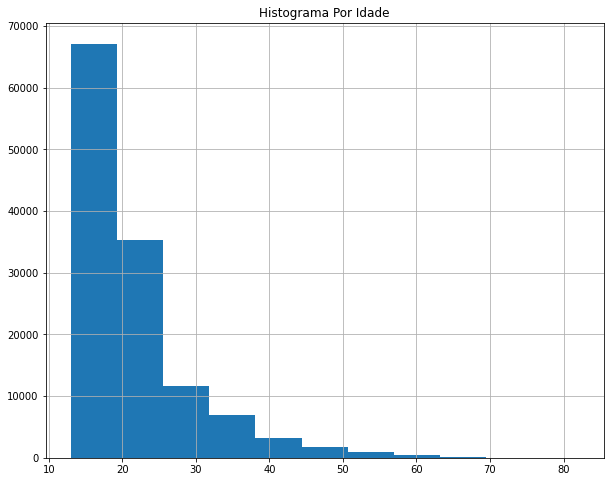

In [63]:
# 1 Histograma
import matplotlib.pyplot as plt
import seaborn as sns


dados['NU_IDADE'].hist(bins=11, figsize=(10,8))
plt.title('Histograma Por Idade')

<font color = white>
Não conseguimos fazer uma interpretação razoável dos dados de idade no gráfico.

Text(0.5, 1.0, 'Histograma Por Idade')

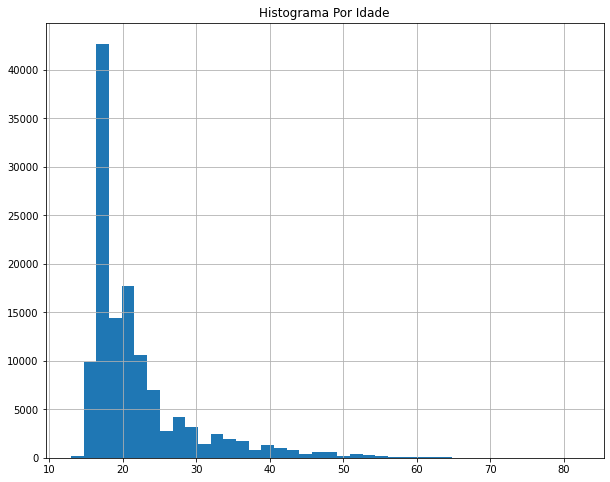

In [64]:
# 2 Histograma

dados['NU_IDADE'].hist(bins=40, figsize=(10,8))
plt.title('Histograma Por Idade')

<font color = white> Com um bins configurado adequadamente, percebemos que a maioria dos inscritos estão entre 16 a 20 anos de idade. 

In [65]:
# Verificando proporção por idade

dados['NU_IDADE'].value_counts(normalize=True).sort_index()

13    0.000031
14    0.001107
15    0.015772
16    0.061470
17    0.166871
        ...   
73    0.000016
75    0.000016
76    0.000008
77    0.000008
82    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

Text(0.5, 1.0, 'Estudantes de 14 anos do Enem 2021')

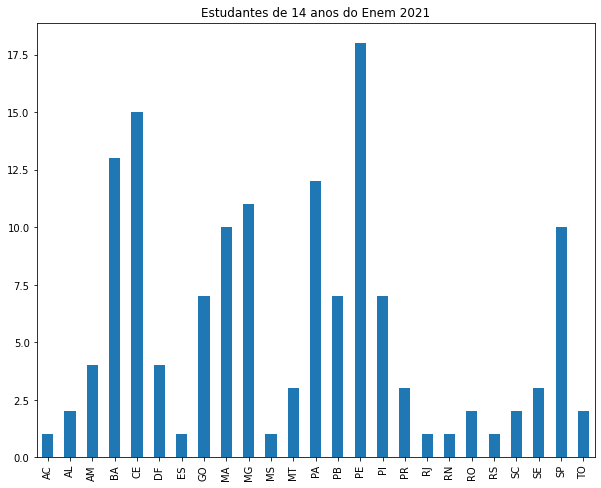

In [72]:
# Veirificando os inscritos de idade = 14 anos por estado

dados.query("NU_IDADE == 14")['SG_UF_PROVA'].value_counts().sort_index().plot(kind='bar', figsize=(10,8))
plt.title("Estudantes de 14 anos do Enem 2021")

De acordo com o Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (Inep), o treineiro Enem é o participante que não cursou ou não concluiu o Ensino Médio, ou aquele que terminará o Ensino Médio após o ano de realização do Enem.

Treineiros :
 0    111979
1     15401
Name: IN_TREINEIRO, dtype: int64
Treineiros :  AxesSubplot(0.125,0.125;0.775x0.755)


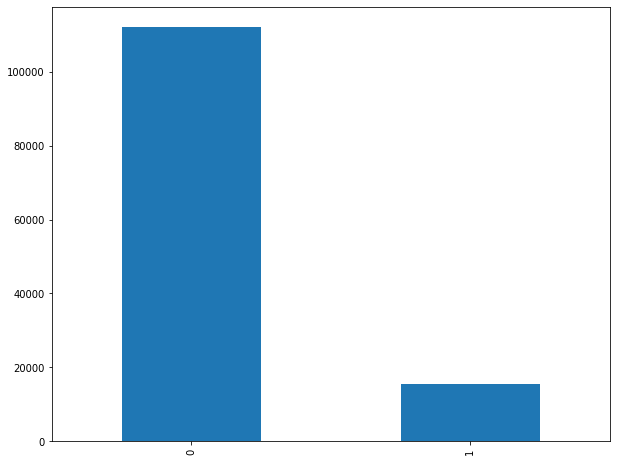

In [78]:
# Verificando apenas os treineiros
# 1 - Treineiros
# 0 = Não Treineiros

print("Treineiros :\n",dados['IN_TREINEIRO'].value_counts())
print("Treineiros : ",dados['IN_TREINEIRO'].value_counts().plot(kind='bar', figsize=(10,8)))


In [83]:
# Verificando apenas os treineiros por UF
# 1 - Treineiros
# 0 = Não Treineiro

dados.query('IN_TREINEIRO == 1')['SG_UF_PROVA'].value_counts().sort_index()


AC      52
AL     225
AM     175
AP      91
BA    1233
CE    1018
DF     214
ES     269
GO     736
MA     541
MG    1751
MS     215
MT     352
PA     746
PB     417
PE     977
PI     434
PR     678
RJ     925
RN     302
RO     159
RR      47
RS     607
SC     422
SE     277
SP    2345
TO     193
Name: SG_UF_PROVA, dtype: int64

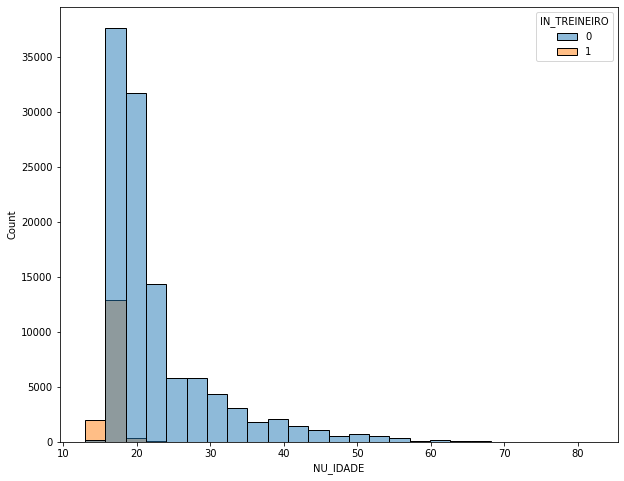

In [84]:
# Histograma

# 1 - Treineiros
# 0 = Não Treineiro



import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(10,8))
sns.histplot(data = dados, x = 'NU_IDADE', hue = 'IN_TREINEIRO',bins = 25)

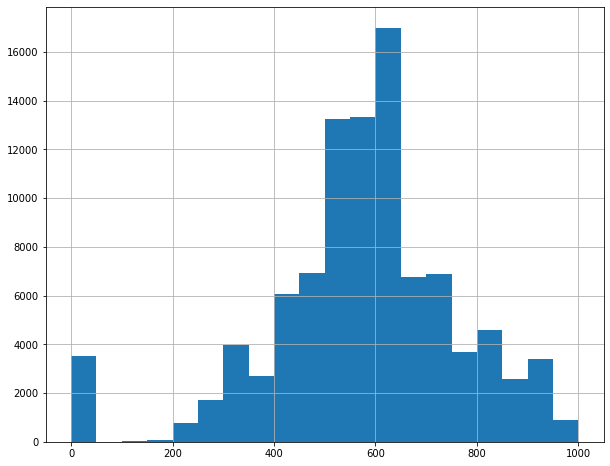

In [87]:
# Verificando algumas notas de provas


dados['NU_NOTA_REDACAO'].hist(bins=20, figsize=(10,8))

In [88]:
# Méida da nota de Redação e Desvio Padrão

print("Média :", dados.NU_NOTA_REDACAO.mean())
print("Desvio Padrão :", dados.NU_NOTA_REDACAO.std())


Média : 571.5700253970197
Desvio Padrão : 188.07645455751802


In [89]:
# Verificando os dados novamente

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [90]:
# Criando a variável para gauardar as notas das provas

Notas_Provas = ['NU_NOTA_CH', 'NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_CN']
Notas_Provas

['NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_CN']

In [ ]:
from pandas.core import describe
# Verificando os dados estatístico das notas

dados[Notas_Provas].describe()

,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_CN
count,39207.000000,37333.000000,39207.000000,39207.000000,37333.000000
mean,508.600798,521.166927,521.490328,583.869207,477.109110
std,81.518548,108.087601,63.250970,188.757569,75.830054
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,450.800000,435.400000,485.200000,500.000000,417.800000
50%,512.400000,498.800000,526.400000,580.000000,469.400000
75%,566.800000,593.000000,564.800000,680.000000,530.900000
max,795.100000,971.900000,747.300000,1000.000000,797.300000


#<font color = yellow> Análises com Boxplot

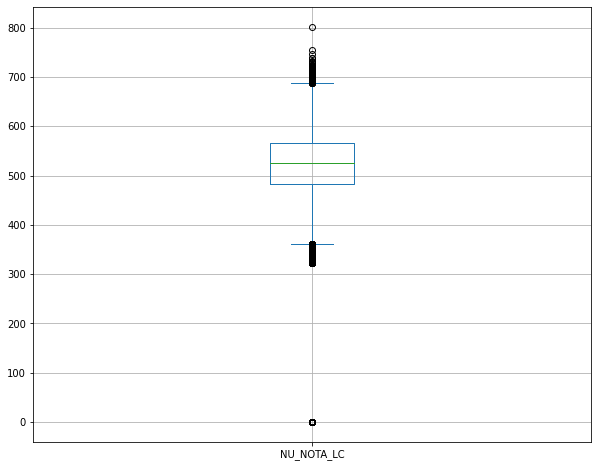

In [91]:
# Plotando um boxplot para analisar as notas de provas

dados['NU_NOTA_LC'].plot.box(grid = True, figsize=(10,8))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


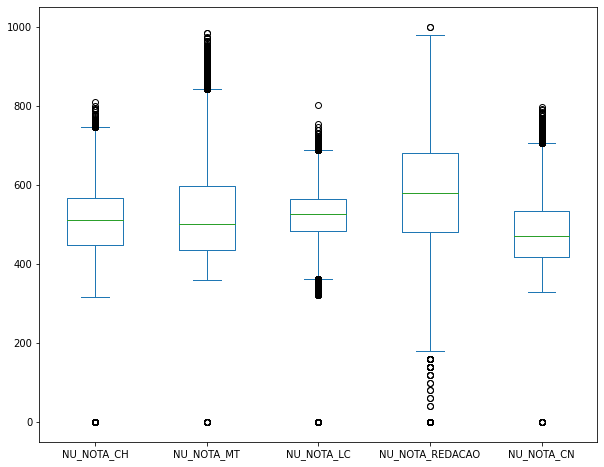

In [95]:
# Com todas as notas de provas


dados[Notas_Provas].plot.box(figsize=(10,8))

#<font color = yellow> Análises com Seaborn

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
dados[Notas_Provas].sum()

NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
NU_NOTA_CN         44334986.1
dtype: float64

In [99]:
# Criando uma coluna chamada "NU_NOTA_TOTAL" para o dataset dados com o somatório de todas as notas(provas) por linha(axis=1)

dados['NU_NOTA_TOTAL'] = dados[Notas_Provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


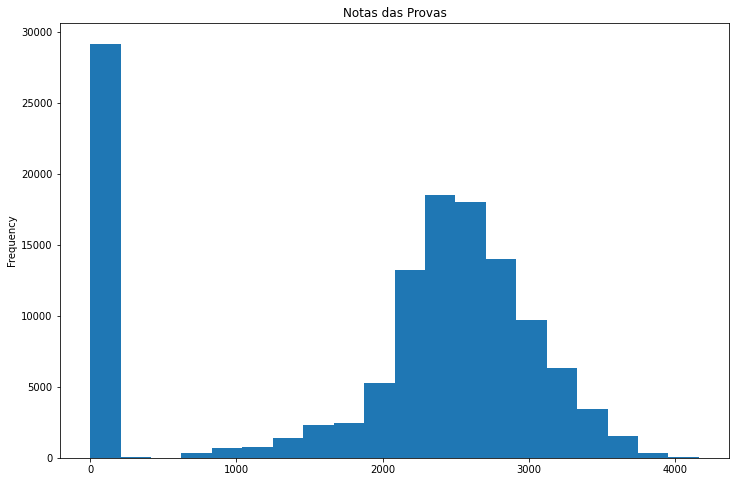

In [108]:
# Histograma com as notas totais

plt.title('Notas das Provas')
dados['NU_NOTA_TOTAL'].plot.hist(bins = 20,figsize=(12,8))


In [110]:
#provas = ['NU_NOTA_CH', 'NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_CN']

# Vamos retirar as notas zeradas do nosso modelo de visualização

Notas_Provas.append('NU_NOTA_TOTAL')
dados[Notas_Provas].query('NU_NOTA_TOTAL == 0')

,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_TOTAL,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
dados_sem_nota_zero = dados[Notas_Provas].query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero.head()

,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_TOTAL
0,512.3,432.4,488.6,420.0,435.6,2288.9
1,409.3,NaN,375.3,400.0,NaN,1184.6
2,499.1,427.2,441.0,560.0,423.2,2350.5
3,578.1,499.9,551.5,500.0,426.2,2555.7
4,571.3,424.5,511.2,780.0,516.5,2803.5


In [ ]:
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Notas Gerais')

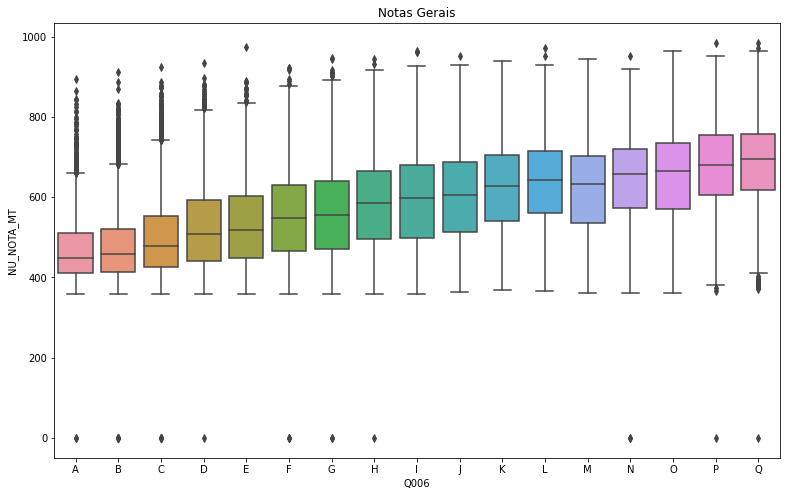

In [ ]:
plt.figure(figsize=(13,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_MT', data = dados, order = renda_ordenada)
plt.title('Notas Gerais')

In [ ]:
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Notas Gerais ')

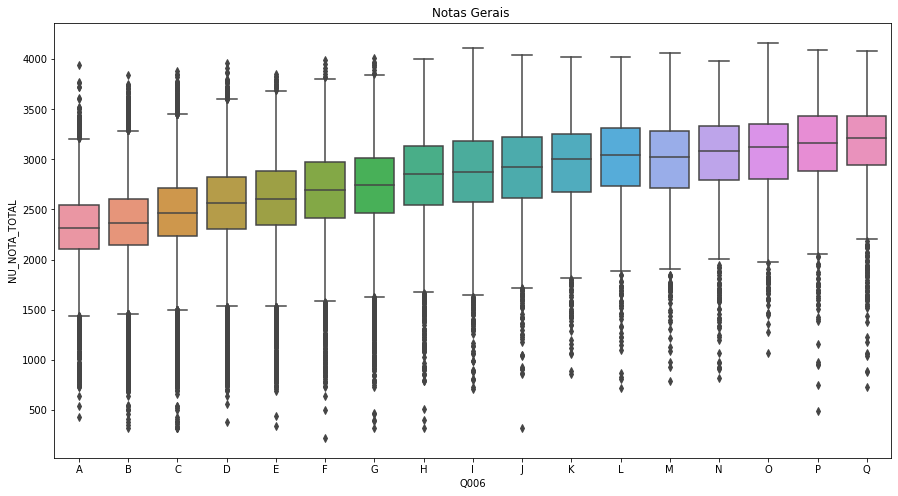

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, order = renda_ordenada)
plt.title('Notas Gerais ')

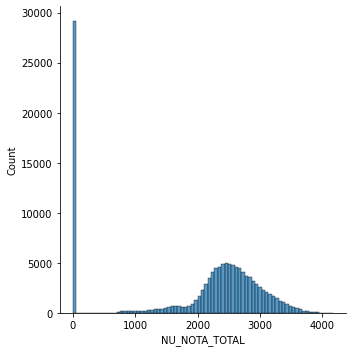

In [ ]:
sns.displot(dados, x = "NU_NOTA_TOTAL")

Text(0.5, 1.0, 'Notas Gerais')

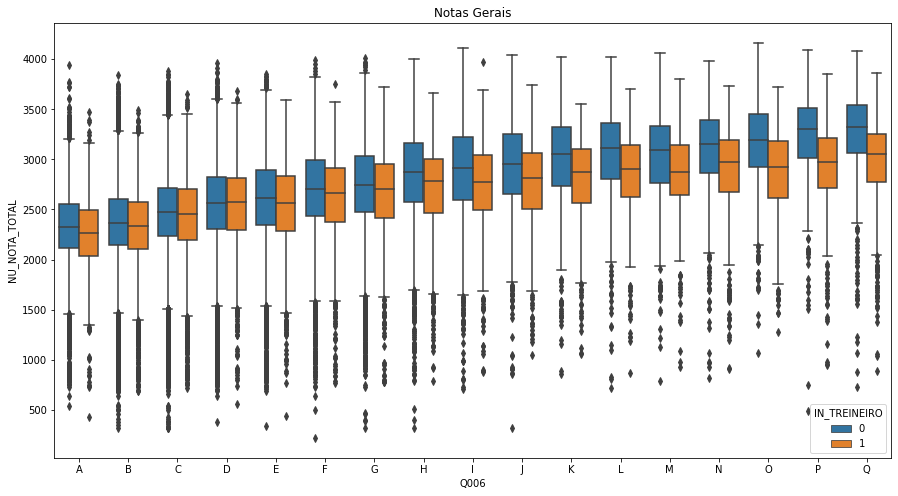

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, hue = 'IN_TREINEIRO', order = renda_ordenada)
plt.title('Notas Gerais')

# Aula 3

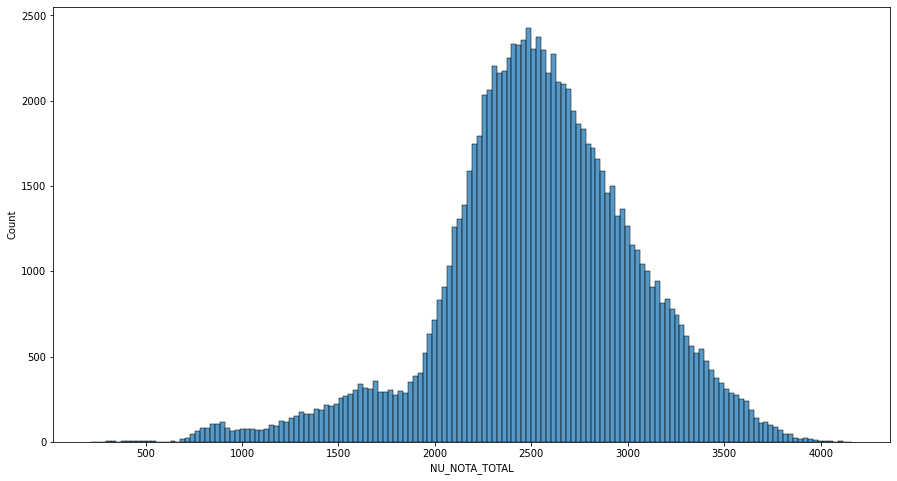

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL')

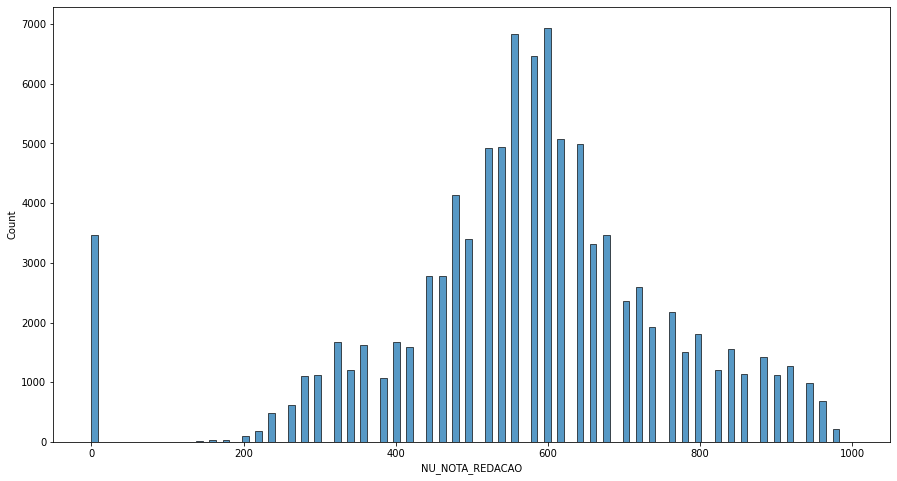

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_REDACAO')

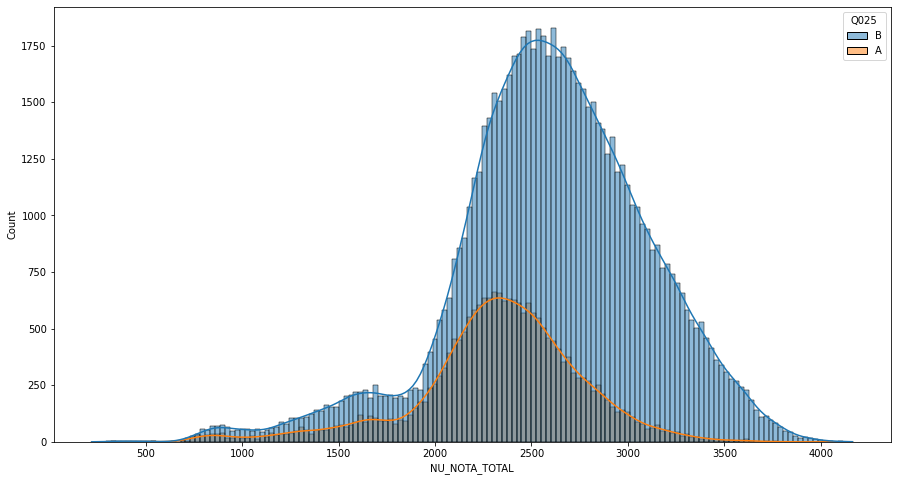

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL', hue = 'Q025', kde = 'True')


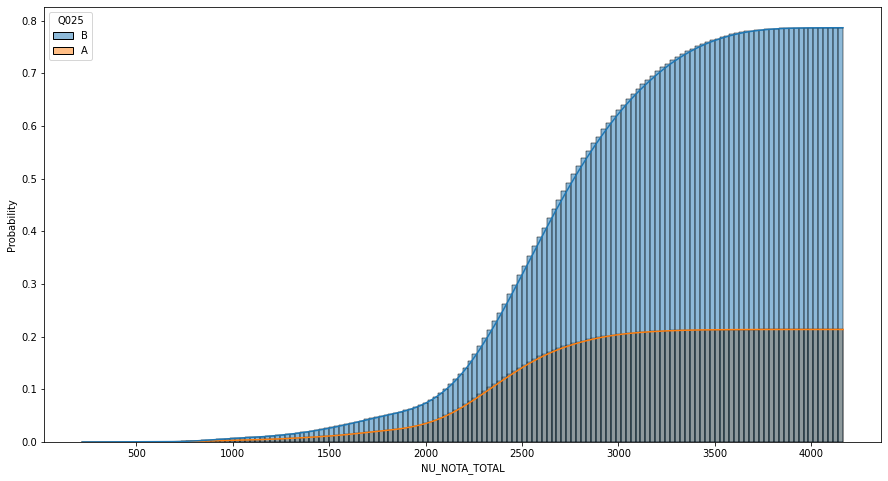

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL', hue = 'Q025', kde = 'True', stat= 'probability', cumulative = True)

# Scatterplot

(-50.0, 1050.0)

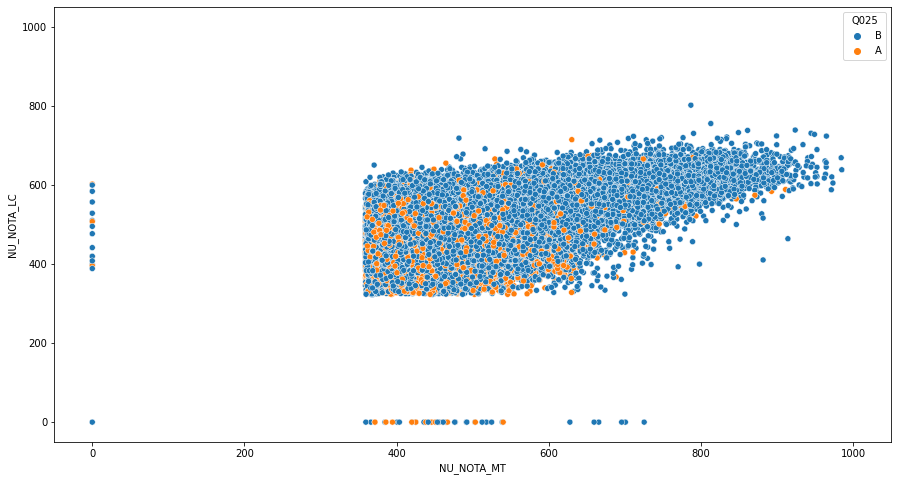

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = dados_sem_nota_zero, x = 'NU_NOTA_MT', y = 'NU_NOTA_LC', hue = 'Q025')
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

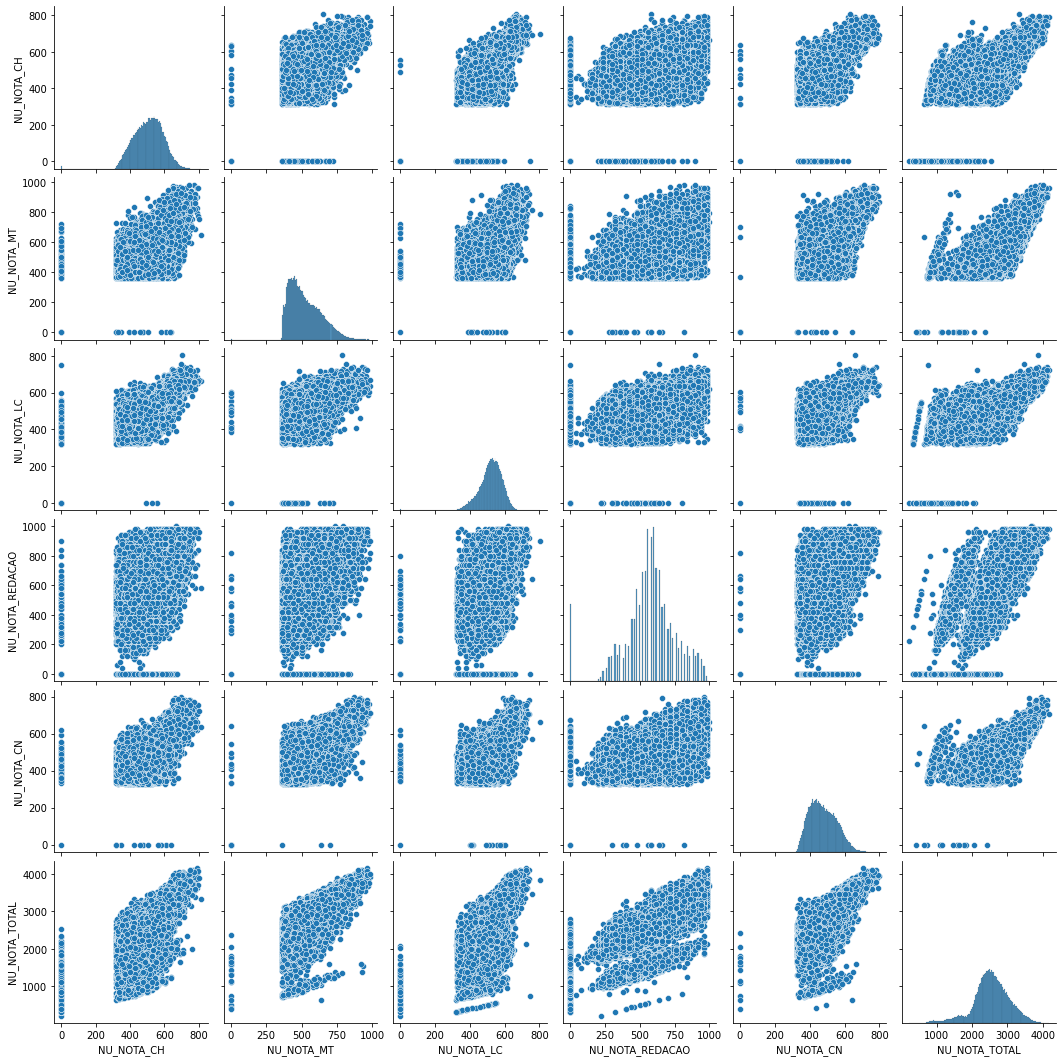

In [ ]:
sns.pairplot(dados_sem_nota_zero[provas])

In [ ]:
# Correlação

correlacao = dados_sem_nota_zero[provas].corr()
correlacao

,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_TOTAL
NU_NOTA_CH,1.000000,0.610332,0.744170,0.528338,0.668979,0.735534
NU_NOTA_MT,0.610332,1.000000,0.587710,0.493046,0.649527,0.790051
NU_NOTA_LC,0.744170,0.587710,1.000000,0.535797,0.641624,0.711686
NU_NOTA_REDACAO,0.528338,0.493046,0.535797,1.000000,0.504740,0.783647
NU_NOTA_CN,0.668979,0.649527,0.641624,0.504740,1.000000,0.785600
NU_NOTA_TOTAL,0.735534,0.790051,0.711686,0.783647,0.785600,1.000000


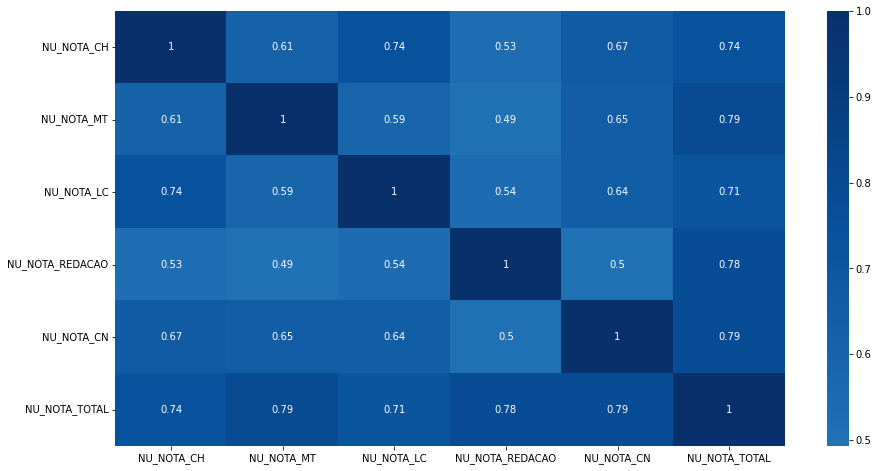

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

<Figure size 1080x576 with 0 Axes>

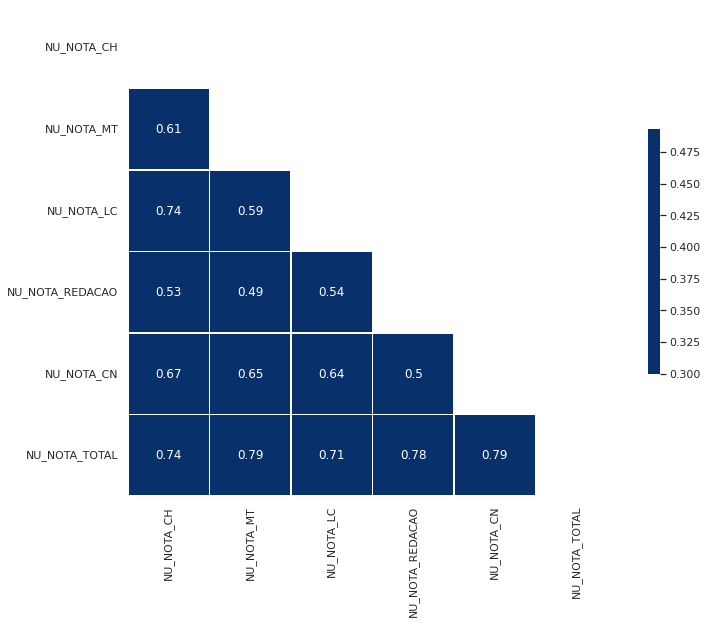

In [ ]:
import numpy as np
from string import ascii_letters
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacao, dtype=bool))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlacao, mask=mask, cmap='Blues', vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Machine Learning

In [ ]:
provas_entrada = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']
provas_saida = 'NU_NOTA_MT'
# Eliminando os valores NAN do conjunto de dados para evitar erros ao treinar o modelo

dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()
notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[provas_saida]



In [ ]:
# Amostra dos dados de notas de entrada
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [ ]:
x = notas_entrada
y = notas_saida

In [ ]:
from sklearn.model_selection import train_test_split

seed = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.25,
                                                        random_state= seed)

In [ ]:
# LinerSVR é uma variação de SVM (suporte Vector Machine) é um modelo linear
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state= seed)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(random_state=4321)

In [ ]:
# Vamos fazer agora uma predição, ou seja, predict da nossa variável x_teste (matemática)

modelo.predict(x_teste)

array([420.31950108, 478.71700082, 385.7069269 , ..., 471.7623776 ,
       540.54672299, 353.78044694])

In [ ]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

In [ ]:
previsoes_matematica = modelo.predict(x_teste)

(-50.0, 1050.0)

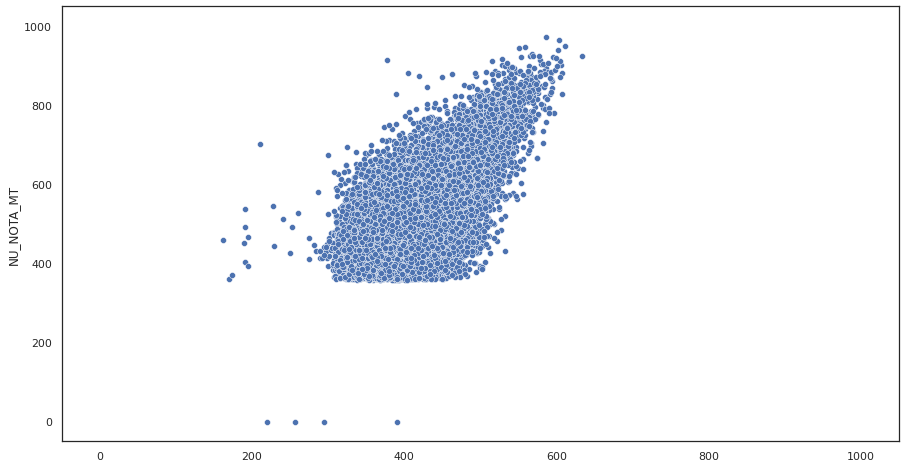

In [ ]:
# plotando em um scatterplor as previções com os dados de teste y
plt.figure(figsize=(15,8))
sns.scatterplot(x = previsoes_matematica, y = y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))


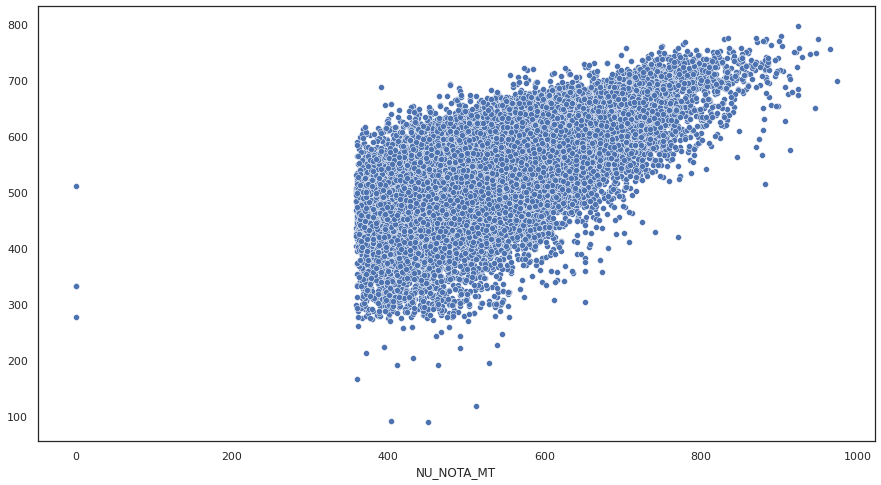

In [ ]:
# Plotando com os erros médios entre as notas dos alunos

plt.figure(figsize=(15,8))
sns.scatterplot(x = y_teste, y = x_teste.mean(axis=1))

In [ ]:
# Criando um DataFrame com os resultados  

Resultados = pd.DataFrame()
Resultados['Real'] = y_teste
Resultados['Previsao'] = previsoes_matematica
Resultados['Diferenca'] = Resultados["Real"] - Resultados["Previsao"]
Resultados

,Real,Previsao,Diferenca
114991,459.7,420.319501,39.380499
104685,617.2,478.717001,138.482999
91028,520.0,385.706927,134.293073
115802,703.8,459.039807,244.760193
93303,627.1,441.995627,185.104373
...,...,...,...
81393,688.6,482.168386,206.431614
40159,479.1,489.849362,-10.749362
64083,501.4,471.762378,29.637622
84661,772.5,540.546723,231.953277


In [ ]:
# Criando um DataFrame com os resultados  

Resultados = pd.DataFrame()
Resultados['Real'] = y_teste
Resultados['Previsao'] = previsoes_matematica
Resultados['Diferenca'] = Resultados["Real"] - Resultados["Previsao"]
Resultados['Quadrado_Diferenca'] = (Resultados["Real"] - Resultados["Previsao"])**2
Resultados

,Real,Previsao,Diferenca,Quadrado_Diferenca
114991,459.7,420.319501,39.380499,1550.823695
104685,617.2,478.717001,138.482999,19177.541062
91028,520.0,385.706927,134.293073,18034.629483
115802,703.8,459.039807,244.760193,59907.551863
93303,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
81393,688.6,482.168386,206.431614,42614.011438
40159,479.1,489.849362,-10.749362,115.548776
64083,501.4,471.762378,29.637622,878.388662
84661,772.5,540.546723,231.953277,53802.322714


In [ ]:
Resultados['Quadrado_Diferenca'].mean()**(1/2)

135.36661229420264

In [ ]:

# Avaliando outro modelo

from sklearn.dummy import DummyRegressor
modeloDummy = DummyRegressor()

modeloDummy.fit(x_treino, y_treino)

dummy_previsao = modeloDummy.predict(x_teste)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_previsao)

12063.645588509502

In [ ]:
mean_squared_error(y_teste, previsoes_matematica)

18324.11972400897

In [ ]:
# Diminuindo o MSE e aumentando o grau de confiança no nosso modelo

from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.25)
modelo_tree = DecisionTreeRegressor(max_depth= 3)
modelo_tree.fit(x_treino, y_treino)
modelo_Predict = modelo_tree.predict(x_teste)
mean_squared_error(y_teste, modelo_Predict)

6162.951825849338

In [ ]:
from sklearn.model_selection import cross_validate


modelo_tree = DecisionTreeRegressor(max_depth=2)
Resultados = cross_validate(modelo_tree, x, y, scoring = "neg_mean_squared_error")
#Resultados['test_score']
Resultados

{'fit_time': array([0.10954261, 0.0754292 , 0.07980013, 0.07689929, 0.08657837]),
 'score_time': array([0.00465441, 0.00425911, 0.00400901, 0.00405383, 0.0045135 ]),
 'test_score': array([-6317.91361711, -6390.69330384, -6519.97057993, -6702.12730215,
        -6851.82019408])}

In [ ]:

modelo_tree = DecisionTreeRegressor(max_depth=2)
Resultados = cross_validate(modelo_tree, x, y, scoring = "neg_mean_squared_error")
Resultados['test_score'] * -1

array([6317.91361711, 6390.69330384, 6519.97057993, 6702.12730215,
       6851.82019408])

In [ ]:
# Calculando a média
modelo_tree = DecisionTreeRegressor(max_depth=2)
Resultados = cross_validate(modelo_tree, x, y, scoring = "neg_mean_squared_error")
media_erros = (Resultados['test_score'] * -1).mean()
media_erros

6556.504999418906

In [ ]:
# Calculando o desvio padrão
def calcula_mse(Resultados):
  media_erros = (Resultados['test_score'] * -1).mean()
  desvio_padrao = (Resultados['test_score'] * -1).std()
  limite_inferior = media_erros - (2*desvio_padrao)
  limite_superior = media_erros + (2*desvio_padrao)

  print(f"intervalo de confiança {limite_inferior} - {limite_superior}")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import numpy as np
seed = 1232
np.random.seed(seed)


partes = KFold(n_splits = 10, shuffle= True)
modelo_tree = DecisionTreeRegressor(max_depth=3)
Resultados = cross_validate(modelo_tree, x, y, cv = partes, scoring = "neg_mean_squared_error")
calcula_mse(Resultados)

intervalo de confiança 5858.741842392759 - 6250.793292491384


In [ ]:
def regressor_arvore(nivel):

  partes = KFold(n_splits = 10, shuffle= True)
  modelo_tree = DecisionTreeRegressor(max_depth=nivel)
  Resultados = cross_validate(modelo_tree, x, y, cv = partes, scoring = "neg_mean_squared_error", return_train_score= True)
 # calcula_mse(Resultados)
  print(f"Treino = {(Resultados['train_score']*-1).mean()} | Teste = {(Resultados['test_score']*-1).mean()}")

regressor_arvore(4)


Treino = 5761.535521462409 | Teste = 5813.591364164388


In [ ]:
for i in range(1,21):
  regressor_arvore(i)

Treino = 7845.283040641034 | Teste = 7854.934735853271
Treino = 6528.361152098539 | Teste = 6551.7823244050005
Treino = 6021.226476914873 | Teste = 6046.855823894962
Treino = 5759.53952705817 | Teste = 5813.166610638438
Treino = 5600.253534804198 | Teste = 5683.116758315385
Treino = 5470.601734501106 | Teste = 5588.413345901124
Treino = 5371.256161385055 | Teste = 5538.420097810567
Treino = 5277.221317213098 | Teste = 5538.996509497736
Treino = 5166.559798017576 | Teste = 5590.981951873679
Treino = 5025.576243417117 | Teste = 5733.375112859836
Treino = 4837.185383096432 | Teste = 5898.958883740275
Treino = 4605.899484124512 | Teste = 6160.08137166267
Treino = 4329.477990458787 | Teste = 6521.342908067281
Treino = 4007.868489839561 | Teste = 6799.108623304119
Treino = 3670.7587657533577 | Teste = 7166.858964382736
Treino = 3305.9983316983066 | Teste = 7608.2488517916745
Treino = 2969.978814045029 | Teste = 7961.042004973728
Treino = 2603.3325676931813 | Teste = 8329.371710567077
Treino 